In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as scp
import tensorflow as tf
import random
import pandas as pd


In [3]:
def gradientDescent(x,y,w,b,alpha,N):

    dJdw = 0
    dJdb = 0

    for xi,yi in zip(x,y):

        dJdw += -2*xi*(yi - (w*xi + b))
        dJdb += -2*(yi - (w*xi + b))

    w -= alpha*dJdw/N
    b -= alpha*dJdb/N

    return w, b

In [4]:

def predict(x,y,alpha,N,epochs):

     w = random.random()
     b = random.random()

     for i in range(epochs):

        w,b = gradientDescent(x, y,w,b,alpha,N)
        yhat = w*x +b
        J = np.divide(np.sum((y-yhat)**2, axis=0), N)
        print(f'{epochs} loss is {J}, parameters w:{w}, b:{b}')
     return w,b

In [5]:
def LSM(x,y,N):

    sum_xy = 0
    sum_x = 0
    sum_y = 0
    sum_x2 = 0

    for xi,yi in zip(x,y):

        sum_xy += xi*yi
        sum_x += xi
        sum_y += yi
        sum_x2 += xi**2

    m = (N*sum_xy - sum_x*sum_y)/(N*sum_x2 - sum_x**2)
    b = (sum_y - m*sum_x)/N

    return m, b

In [39]:
df=pd.read_csv('Salary_dataset.csv')
x=df['YearsExperience']
y=df['Salary']
x=np.asarray(x)
y=np.asarray(y)
x=np.reshape(x,(30,1))
y=np.reshape(y,(30,1))
epochs = 100
alpha=0.01
N=x.shape[0]
print(x)
print(y)
print(N)

[[ 1.2]
 [ 1.4]
 [ 1.6]
 [ 2.1]
 [ 2.3]
 [ 3. ]
 [ 3.1]
 [ 3.3]
 [ 3.3]
 [ 3.8]
 [ 4. ]
 [ 4.1]
 [ 4.1]
 [ 4.2]
 [ 4.6]
 [ 5. ]
 [ 5.2]
 [ 5.4]
 [ 6. ]
 [ 6.1]
 [ 6.9]
 [ 7.2]
 [ 8. ]
 [ 8.3]
 [ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]]
[[ 39344.]
 [ 46206.]
 [ 37732.]
 [ 43526.]
 [ 39892.]
 [ 56643.]
 [ 60151.]
 [ 54446.]
 [ 64446.]
 [ 57190.]
 [ 63219.]
 [ 55795.]
 [ 56958.]
 [ 57082.]
 [ 61112.]
 [ 67939.]
 [ 66030.]
 [ 83089.]
 [ 81364.]
 [ 93941.]
 [ 91739.]
 [ 98274.]
 [101303.]
 [113813.]
 [109432.]
 [105583.]
 [116970.]
 [112636.]
 [122392.]
 [121873.]]
30


In [40]:

w1,b1=predict(x,y,alpha,N,epochs)
ygd=(x*w1)+b1
print(ygd)

100 loss is [5.1461191e+08], parameters w:[9700.11580292], b:[1520.10548603]
100 loss is [1.6212368e+08], parameters w:[12040.2107479], b:[1959.58417205]
100 loss is [1.40584777e+08], parameters w:[12596.87357156], b:[2136.91900497]
100 loss is [1.38486314e+08], parameters w:[12721.41188355], b:[2250.43911285]
100 loss is [1.37536244e+08], parameters w:[12741.27889254], b:[2348.20547067]
100 loss is [1.36660392e+08], parameters w:[12735.82398148], b:[2441.86556649]
100 loss is [1.35795625e+08], parameters w:[12724.27518434], b:[2534.24304543]
100 loss is [1.3493818e+08], parameters w:[12711.29172921], b:[2626.02332457]
100 loss is [1.34087783e+08], parameters w:[12698.0024831], b:[2717.37367353]
100 loss is [1.33244362e+08], parameters w:[12684.68082478], b:[2808.33579788]
100 loss is [1.3240786e+08], parameters w:[12671.39282899], b:[2898.9209713]
100 loss is [1.3157822e+08], parameters w:[12658.15433652], b:[2989.13308825]
100 loss is [1.30755386e+08], parameters w:[12644.96901606], 

In [41]:
w,b=LSM(x,y,N)
print('weight=',w)
print('bias=',b)
yls=(x*w)+b
#print(yls)

weight= [9449.96232146]
bias= [24848.20396652]


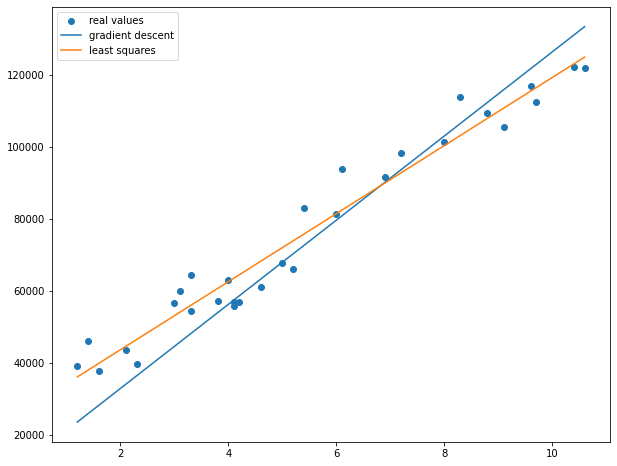

In [42]:




plt.figure(figsize=(10,8))
plt.scatter(x,y,label='real values')
plt.plot(x,ygd,label='gradient descent')

plt.plot(x,yls,label='least squares')

plt.legend()

plt.show()


In [43]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x,y)
ylr=model.predict(x)
print(ylr)

[[ 36188.15875227]
 [ 38078.15121656]
 [ 39968.14368085]
 [ 44693.12484158]
 [ 46583.11730587]
 [ 53198.09093089]
 [ 54143.08716303]
 [ 56033.07962732]
 [ 56033.07962732]
 [ 60758.06078805]
 [ 62648.05325234]
 [ 63593.04948449]
 [ 63593.04948449]
 [ 64538.04571663]
 [ 68318.03064522]
 [ 72098.0155738 ]
 [ 73988.00803809]
 [ 75878.00050238]
 [ 81547.97789525]
 [ 82492.9741274 ]
 [ 90052.94398456]
 [ 92887.932681  ]
 [100447.90253816]
 [103282.8912346 ]
 [108007.87239533]
 [110842.86109176]
 [115567.84225249]
 [116512.83848464]
 [123127.81210966]
 [125017.80457395]]


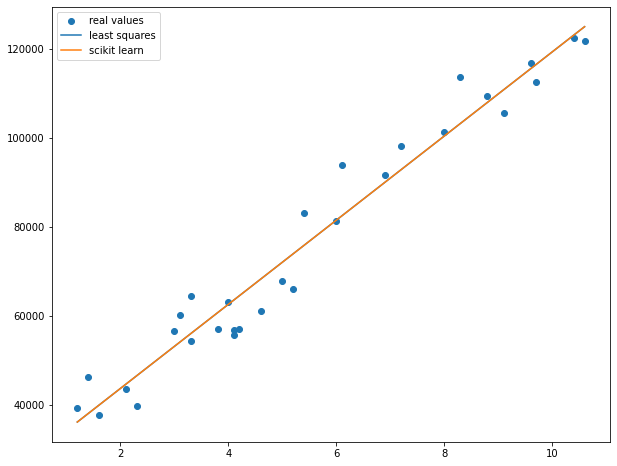

In [44]:
plt.figure(figsize=(10,8))
plt.scatter(x,y,label='real values')
plt.plot(x,yls,label='least squares')
plt.plot(x,ylr,label='scikit learn')
plt.legend()
plt.show()

In [45]:
nn=tf. keras . models . Sequential ()
nn . add ( tf. keras . layers . Dense ( units =24 , input_dim =1 ,
activation =tf. nn. relu ))
nn . add ( tf. keras . layers . Dense ( units =32 , activation =tf. nn. relu ))
nn . add ( tf. keras . layers . Dense ( units =40 , activation =tf. nn. relu ))
nn . add ( tf. keras . layers . Dense ( units =1 , activation =tf.nn.relu))


In [46]:
nn . compile ( optimizer =tf. keras . optimizers . Adam ( learning_rate =0.1),
loss =tf. keras . losses .MSE )

In [47]:
nn . fit ( x=x, y=y , epochs =epochs , verbose =1)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 6502937088.0000
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 6498915840.0000
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 6485701120.0000
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 6453654528.0000
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 6389867008.0000
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 6277272064.0000
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 6094476800.0000
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 5816123392.0000
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 5414265344.0000
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 4861534208.0000
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 4137384704.0000
Epoch 12/100
1/1 [========================

In [48]:
ynn=nn.predict(x)
ynn

1/1 [==============================] - 0s 68ms/step


array([[ 31803.178],
       [ 33873.523],
       [ 35943.87 ],
       [ 41119.74 ],
       [ 43190.086],
       [ 50436.3  ],
       [ 51471.47 ],
       [ 53541.82 ],
       [ 53541.82 ],
       [ 58717.684],
       [ 60788.03 ],
       [ 61823.21 ],
       [ 61823.21 ],
       [ 62858.375],
       [ 66999.07 ],
       [ 71139.77 ],
       [ 73210.12 ],
       [ 75280.46 ],
       [ 81491.51 ],
       [ 82526.68 ],
       [ 90808.06 ],
       [ 93913.58 ],
       [102194.97 ],
       [105300.49 ],
       [110476.36 ],
       [113581.88 ],
       [118757.74 ],
       [119792.914],
       [127039.125],
       [129109.49 ]], dtype=float32)

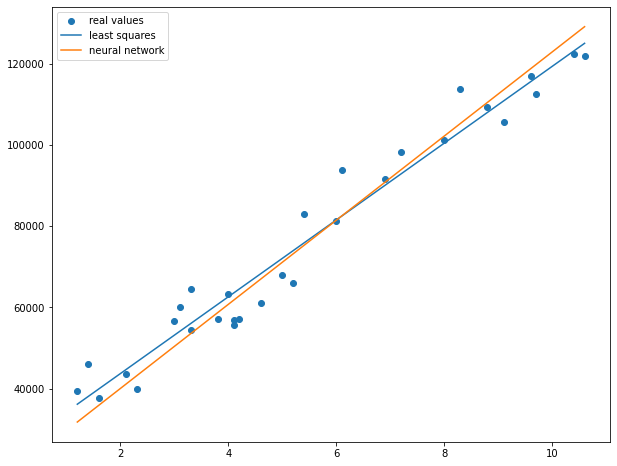

In [49]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, label='real values')
plt.plot(x, yls, label='least squares')
plt.plot(x, ynn, label='neural network')
plt.legend()
plt.show()